**Prediction using Supervised Learning**

A simple linear regression including two variables to predict the exam result percentage of a student based on the number of study hours.

Intern: Samyukta Vasaikar

Importing Libraries

In [67]:
# data manipulation
import pandas as pd

# scientific computing
import numpy as np  

# data visualisation
import matplotlib.pyplot as plt  

# splitting data into training and testing data set
from sklearn.model_selection import train_test_split  

# model selection
from sklearn.linear_model import LinearRegression  

# model evaluation
from sklearn import metrics  

Importing Data

In [68]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
print("Dataset imported sucessfully")

Dataset imported sucessfully


Understanding the Data

In [69]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [70]:
df.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [71]:
df.shape

(25, 2)

In [72]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [73]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Data Visualisation

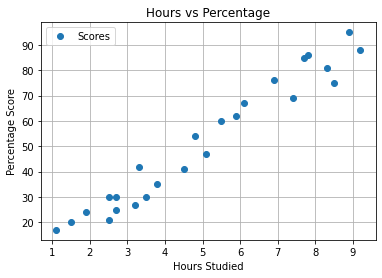

In [75]:
# Plotting the distribution of scores

df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

Preparing Data

In [76]:
# all rows, all columns except last column
X = df.iloc[:, :-1].values  

# all rows and last column
y = df.iloc[:, 1].values  

Splitting Data

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

Training Data

In [78]:
model = LinearRegression()  
model.fit(X_train, y_train) 

print("Training complete.")

Training complete.


Training Data Visualisation

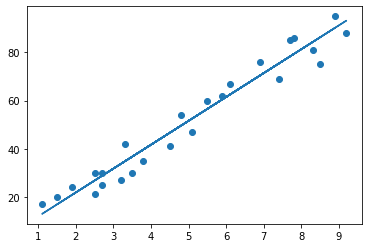

In [79]:
# Plotting the regression line

# y = mx + c
line = model.coef_*X + model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

Prediction for Training Data

In [80]:
# Predicting the scores

y_pred = model.predict(X_test) 

Comparing Actual Values vs Predicted Values

In [81]:
compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  

In [82]:
compare

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Prediction for Testing Data

In [83]:
hours = np.array(9.25)
own_pred = model.predict(hours.reshape(1, -1))

print(f"No of Hours = {hours}")
print(f"Predicted Score = {own_pred[0]}")

No of Hours = 9.25
Predicted Score = 93.69173248737539


Model Accuracy Score

In [84]:
model.score(X_test, y_test)

0.9454906892105354

Model Evaluation

In [85]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
